In [1]:
import tensorflow as tf 
print(tf.__version__)

2.0.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

In [3]:
#Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(16, activation = 'relu', name = 'layer_1'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax'),
    
])

In [ ]:
# print model weights
model.weights

In [ ]:
model.summary()

### Convolution and pooling layers

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [5]:
#Build Sequential convolution neural network model
#try with padding, strides, data_type = channels_first for both layers

model = Sequential([
    Conv2D(16,(3,3), padding = 'SAME', strides = 2, activation = 'relu', input_shape = (28,28,1), data_format = 'channels_last'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation = 'softmax')
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


### Compile Method

In [6]:
#Define the model optimizer, loss function and metrics
#Remember to pass string if directly passing the name of optimizer

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer = opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = [acc, mae])

In [ ]:
#print the model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

### The Fit Method

In [7]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [8]:
# Load the Fashion-Mnist datatset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()


In [10]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16,(3,3), activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation = 'softmax')
])

In [11]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Define the model optimizer, loss function and metrics
#Remember to pass string if directly passing the name of optimizer

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer = opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = [acc, mae])

In [13]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [20]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])
print(labels[train_labels[0]])

9
Ankle boot


In [16]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.
test_images = test_images/255. 


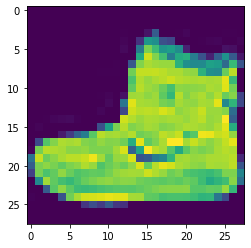

label: Ankle boot


In [19]:
# Display one of the images

i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

In [21]:
# Fit the model
# train_images size dimension needs to be checked.

model.fit(train_images[...,np.newaxis], train_labels, epochs = 2, batch_size=256)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 10s 164us/sample - loss: 0.5673 - sparse_categorical_accuracy: 0.7989 - mean_absolute_error: 4.4200
Epoch 2/2
60000/60000 [==============================] - 10s 172us/sample - loss: 0.3684 - sparse_categorical_accuracy: 0.8697 - mean_absolute_error: 4.4200


In [ ]:
# verbose = 0,1,2 (values)
# 2 - Print one line per epoch
# 1 - is default
# 0 - will silence the print out

model.fit(train_images[...,np.newaxis], train_labels, epochs = 2, batch_size=256, verbose = #0,1,2)

In [22]:
# Saving the model.fit into history object for 8 epochs with verbose 2

history = model.fit(train_images[...,np.newaxis], train_labels, epochs = 8, batch_size=256, verbose=2)

Train on 60000 samples
Epoch 1/8
60000/60000 - 7s - loss: 0.3355 - sparse_categorical_accuracy: 0.8804 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 - 8s - loss: 0.3166 - sparse_categorical_accuracy: 0.8878 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 - 9s - loss: 0.3043 - sparse_categorical_accuracy: 0.8916 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 - 10s - loss: 0.2962 - sparse_categorical_accuracy: 0.8935 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 - 11s - loss: 0.2872 - sparse_categorical_accuracy: 0.8958 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 - 12s - loss: 0.2787 - sparse_categorical_accuracy: 0.8999 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 - 13s - loss: 0.2728 - sparse_categorical_accuracy: 0.9022 - mean_absolute_error: 4.4200
Epoch 8/8
60000/60000 - 12s - loss: 0.2671 - sparse_categorical_accuracy: 0.9037 - mean_absolute_error: 4.4200


In [23]:
# Load the history into a pandas DataFrame
# history object contains history attribute of the model for loss functions and matrix after each of epoch in dictionary format.

df = pd.DataFrame(history.history)
df.head()


,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.335514,0.880383,4.419998
1,0.316602,0.887767,4.419999
2,0.304346,0.891550,4.420000
3,0.296240,0.893550,4.419999
4,0.287154,0.895783,4.420002


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

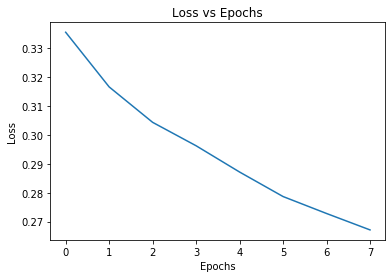

In [24]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title = "Loss vs Epochs", legend = False)
loss_plot.set(xlabel="Epochs", ylabel = "Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

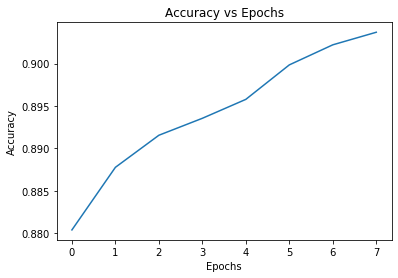

In [25]:
# Make a plot for the accuracy

loss_plot = df.plot(y="sparse_categorical_accuracy", title = "Accuracy vs Epochs", legend = False)
loss_plot.set(xlabel="Epochs", ylabel = "Accuracy")


[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

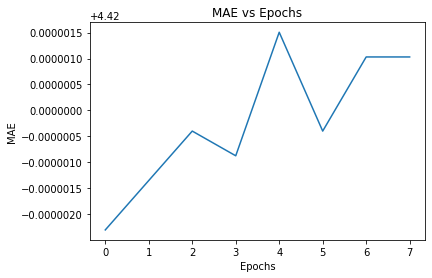

In [26]:
# Make a plot for the additional metric

loss_plot = df.plot(y="mean_absolute_error", title = "MAE vs Epochs", legend = False)
loss_plot.set(xlabel="Epochs", ylabel = "MAE")